In [1]:
from yass.batch import BatchProcessor
from yass.preprocess.filter import _butterworth
from functools import partial
import numpy as np
from os import path
import matplotlib.pyplot as plt
import logging

/Users/Edu/miniconda3/envs/yass/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
logging.basicConfig(level=logging.DEBUG)

CHANNELS = 49

In [3]:
filtering = partial(_butterworth, low_frequency=300,
                    high_factor=0.1, order=3,
                    sampling_frequency=20000)
filtering.__name__ = 'filtering'

In [4]:
path_to_data = path.expanduser('~/data/yass/ej49_data1_set1.bin')
path_to_output = path.expanduser('~/Desktop/out.bin')
data = np.fromfile(path_to_data,
                   dtype='int16').reshape(-1, CHANNELS)

In [5]:
data.shape

(6000000, 49)

In [9]:
bp = BatchProcessor(path_to_data, dtype='int16', n_channels=CHANNELS,
                    data_order='samples', loader='memmap',
                    max_memory='300MB')

DEBUG:yass.batch.generator:Max memory: 300 MB. Itemsize: 2 bytes


In [10]:
%%timeit -n1 -r1
res = bp._multi_channel_apply_disk_parallel(filtering, None, path_to_output,
                                      None, None, 'all',
                                     None, False, False,
                                           processes=8)

DEBUG:yass.batch.generator:Observations per channel: 6,000,000. Number of channels: 49. Total observations: 294,000,000 Size to traverse: 560.76 MB
DEBUG:yass.batch.generator:Max observations per batch: 157,286,374 (300 MB), 3,209,926 max observations per channel
DEBUG:yass.batch.generator:Number of batches: 2
DEBUG:yass.batch.generator:Last batch with 136,713,626 observations (273427252), 2,790,074 observations per channel


22.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [11]:
%%timeit -n1 -r1
bp.multi_channel_apply(filtering, 'disk', output_path=path_to_output)

INFO:yass.batch.batch:Applying function filtering...
DEBUG:yass.batch.generator:Observations per channel: 6,000,000. Number of channels: 49. Total observations: 294,000,000 Size to traverse: 560.76 MB
DEBUG:yass.batch.generator:Max observations per batch: 157,286,374 (300 MB), 3,209,926 max observations per channel
DEBUG:yass.batch.generator:Number of batches: 2
DEBUG:yass.batch.generator:Last batch with 136,713,626 observations (273427252), 2,790,074 observations per channel
DEBUG:yass.batch.batch:Processing batch 0...
DEBUG:yass.batch.batch:Processing batch 1...
INFO:yass.batch.batch:filtering took 23.9349 seconds


23.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/Edu/miniconda3/envs/yass/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


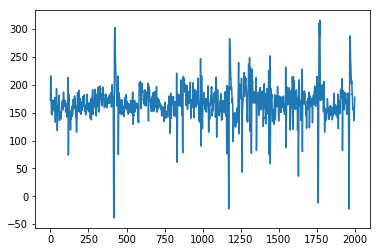

In [6]:
plt.plot(data[:2000, 2])

In [ ]:
%%timeit
filtering(data)

In [ ]:
bp = BatchProcessor(path_to_data, dtype='int16', n_channels=CHANNELS,
                    data_order='samples', loader='array')

In [13]:
%%timeit
bp.multi_channel_apply(filtering, 'memory')

INFO:yass.batch.batch:Applying function filtering...
DEBUG:yass.batch.generator:Observations per channel: 6,000,000. Number of channels: 7. Total observations: 42,000,000 Size to traverse: 80.11 MB
DEBUG:yass.batch.generator:Max observations per batch: 536,870,908 (1024 MB), 76,695,844 max observations per channel
DEBUG:yass.batch.generator:Number of batches: 1
DEBUG:yass.batch.generator:Last batch with 42,000,000 observations (84000000), 6,000,000 observations per channel
DEBUG:yass.batch.batch:Processing batch 0...
INFO:yass.batch.batch:filtering took 1.1146 seconds
INFO:yass.batch.batch:Applying function filtering...
DEBUG:yass.batch.generator:Observations per channel: 6,000,000. Number of channels: 7. Total observations: 42,000,000 Size to traverse: 80.11 MB
DEBUG:yass.batch.generator:Max observations per batch: 536,870,908 (1024 MB), 76,695,844 max observations per channel
DEBUG:yass.batch.generator:Number of batches: 1
DEBUG:yass.batch.generator:Last batch with 42,000,000 observa

1.11 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
res = bp._multi_channel_apply_disk_parallel(filtering, None, None,
                                      None, None, 'all',
                                     None, False, False,
                                           processes=1)

DEBUG:yass.batch.generator:Observations per channel: 6,000,000. Number of channels: 49. Total observations: 294,000,000 Size to traverse: 560.76 MB
DEBUG:yass.batch.generator:Max observations per batch: 52,428,775 (100 MB), 1,069,975 max observations per channel
DEBUG:yass.batch.generator:Number of batches: 6
DEBUG:yass.batch.generator:Last batch with 31,856,125 observations (63712250), 650,125 observations per channel


finished running...
finished running...
finished running...
finished running...
finished running...
finished running...


In [1]:
1

1